- Problem Statement:
        The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- Dependent variable is "Survived"
- Sibsp - Number of Siblings/Spouses Aboard. 
- Parch - Number of Parents/Children Aboard.

In [4]:
df.shape

(891, 12)

- Number of rows-891
- Number of columns-12

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are 5 categorical features-Name, Sex, Ticket, Cabin and Embarked.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Missing values:
        Age-177
        Cabin-687
        Embark-2

<AxesSubplot:>

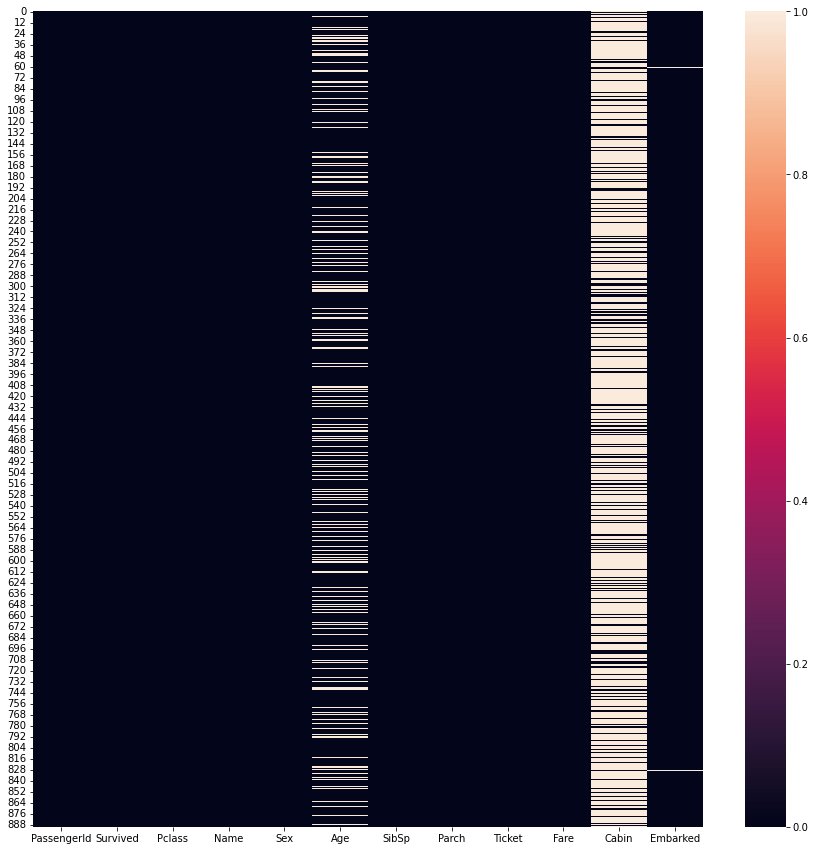

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x10b6a07fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x10b5f1d730>,
 'boxes': [<matplotlib.lines.Line2D at 0x10b6a07c40>],
 'medians': [<matplotlib.lines.Line2D at 0x10b5f1de50>],
 'fliers': [<matplotlib.lines.Line2D at 0x10b5f2b220>],
 'means': []}

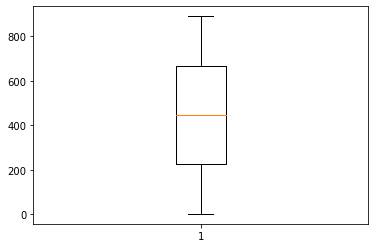

In [10]:
plt.boxplot(df['PassengerId'])

No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x10b5f84760>,
 'caps': [<matplotlib.lines.Line2D at 0x10b5f84e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x10b5f843d0>],
 'medians': [<matplotlib.lines.Line2D at 0x10b5f905e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10b5f90970>],
 'means': []}

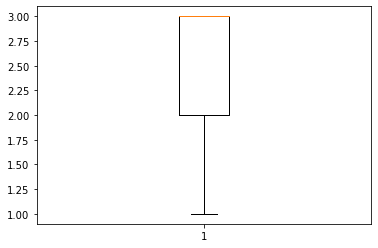

In [11]:
plt.boxplot(df['Pclass'])

No outliers

<AxesSubplot:xlabel='SibSp'>

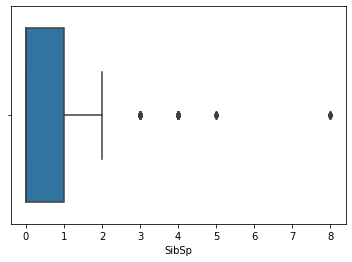

In [12]:
sns.boxplot(df['SibSp'])

Four outliers present

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Parch'>

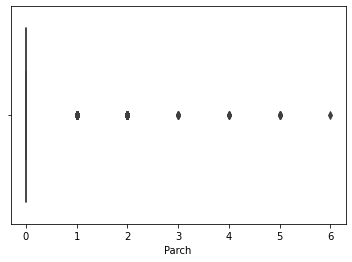

In [14]:
sns.boxplot(df['Parch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10b60ca670>,
 'caps': [<matplotlib.lines.Line2D at 0x10b60cad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x10b60ca2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x10b60d74f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10b60d7880>],
 'means': []}

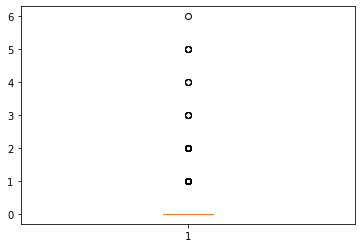

In [15]:
plt.boxplot(df['Parch'])

high outliers

<AxesSubplot:xlabel='Fare'>

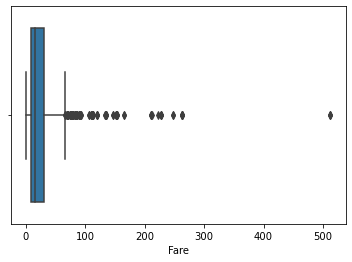

In [16]:
sns.boxplot(df['Fare'])

Outliers present

4.787316519674893


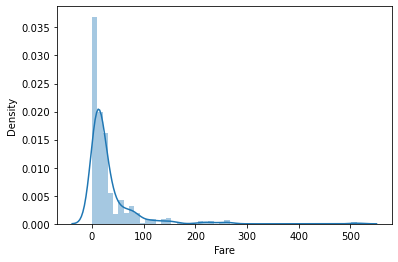

In [17]:
sns.distplot(df.Fare)
print(df['Fare'].skew())

Right skewed data points

2.7491170471010933


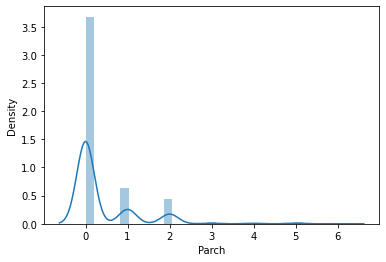

In [18]:
sns.distplot(df['Parch'])
print(df['Parch'].skew())

Bimodal and right skewness

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0.0


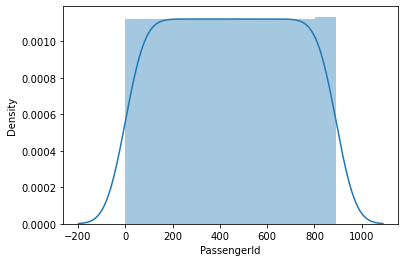

In [20]:
sns.distplot(df.PassengerId)
print(df['PassengerId'].skew())

No skewness

0.4785234382949897


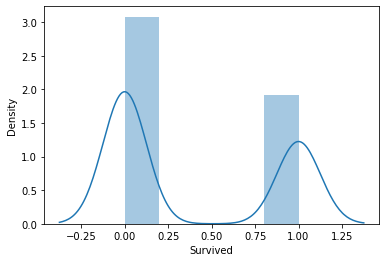

In [21]:
sns.distplot(df.Survived)
print(df['Survived'].skew())

It's bimodal graph and more data points are on right side

0.38910778230082704


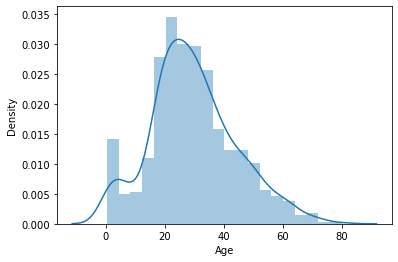

In [22]:
sns.distplot(df.Age)
print(df['Age'].skew())

- More passenger are range in 20 to 40 years.
- little bit/no skewness

3.6953517271630565


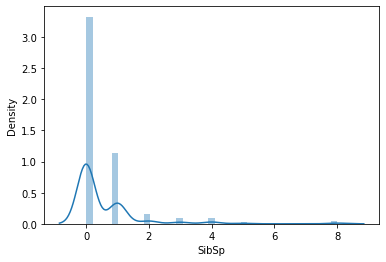

In [23]:
sns.distplot(df['SibSp'])
print(df['SibSp'].skew())

Hight right skewness

In [24]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- PassengerId will not give us much information.
- Servived is much positive correlated with Fare and negative correlative with Pclass.
- Pclass is positively correlated with SibSP and negative correlated with Fare.
- Age is positively correlated with Fare and negatively correlated with Pclass and SibSp.
- Parch is positively corrected with SibSp & Fare and negative correlated with Age.
- Fare is positively correlated with Survived & Parch and negatively correlated with Pclass

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
round(df.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


- Survived:
        Mean-0.38
        Std-0.49
        Min-0.00
        Max-1.00
- Pclass:
        Mean-2.31
        Std-0.84
        Min-1.00
        Max-3.00
- SibSp:
        Mean-0.52
        Std-1.10
        Min-0.00
        Max-8.00
- Parch:
        Mean-0.38
        Std-0.81
        Min-0.00
        Max-6.00
- Age:
        Mean-29.69
        Std-14.53
        Min-0.42
        Max-80.00
- Fare:
        Mean-32.20
        Std-49.69
        Min-0.00
        Max-512.33


<AxesSubplot:>

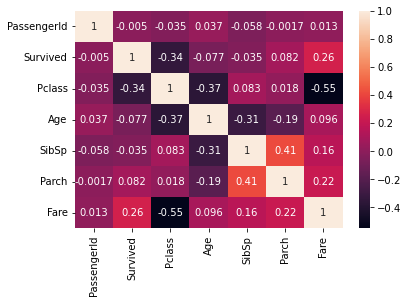

In [27]:
sns.heatmap(df.corr(),annot=True)

- Survived and Pclass negatively correlated 34%
- Pclass and Age negatively correlated 37% 
- Age and SibSp negatively correlated 31% 
- Fare is negatively correlated with Pclass 55%

- Survived is highly positive correlated with Fare 26%
- Survived is highly negative correlated with Fare 34%
- Survived is negative correlated with Age 0.07%
- Survived is negative correlated with Parch 0.08%
- Survived is negative correlated with SibSp 0.03%

# Relationship between Pclass and Fare

<AxesSubplot:xlabel='Pclass', ylabel='count'>

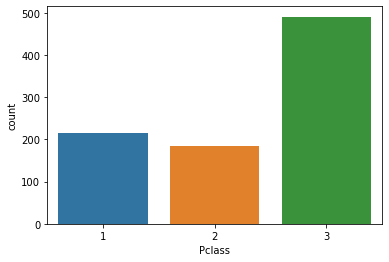

In [28]:
sns.countplot(df['Pclass'])

In [29]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- Passenger class 1: 216 passenger(High Fare)
- Passenger class 2: 184 passenger(Medium Fare)
- Passenger class 3: 491 passenger(Low Fare)

<AxesSubplot:ylabel='Pclass'>

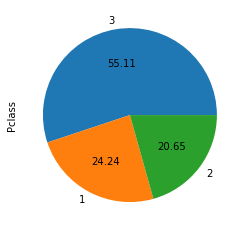

In [30]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.2f')

- People travel in class 1= 24%
- People travel in class 1= 20%
- People travel in class 1= 55%

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

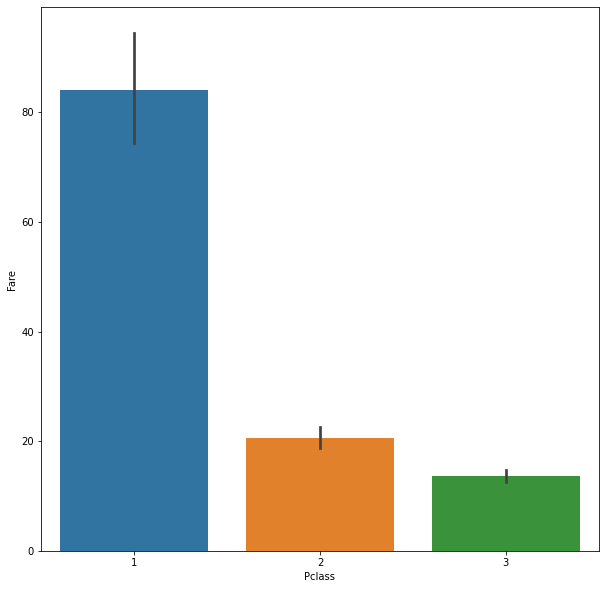

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Pclass'],y=df['Fare'],data=df)

<AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>

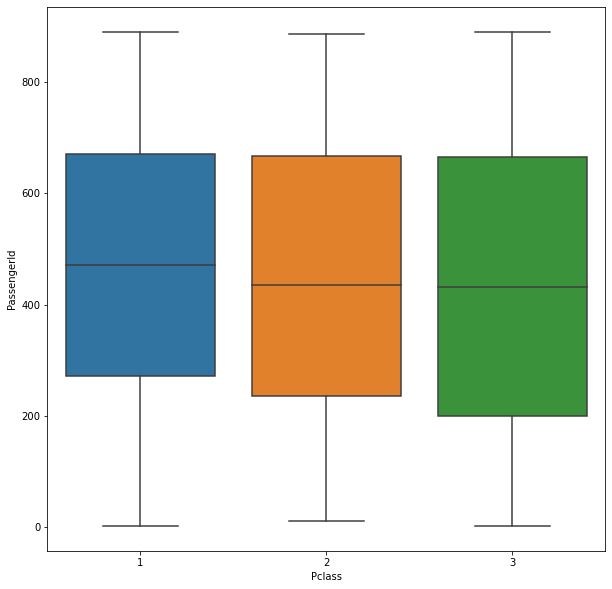

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Pclass'],y=df['PassengerId'],data=df)

If we see line 42 and line 43 and conclude as Fare increases more people like to trave in class 2 and class 3.

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

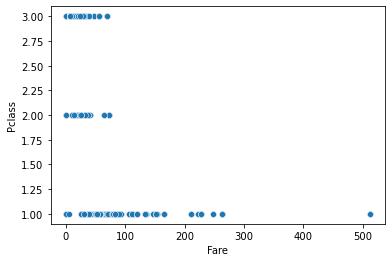

In [34]:
sns.scatterplot(df['Fare'],df['Pclass'])

- Class 2 and Class 3 people paid $0  to $95
- Class 1 people paid $0  to $512

# Relationship between Pclass and Survived 

In [35]:
a=pd.crosstab(df['Survived'],df['Pclass'])
a

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


- More people(136) has survived in Pclass 1 compare to class 2 and class 3
- More people(87) has survived in Pclass 2 compare to class 3 in term of percentage

<AxesSubplot:xlabel='Survived'>

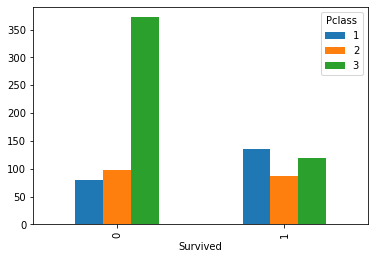

In [36]:
a.plot(kind='bar')

- Most people died in Pclass 3
- Less people died in Pclass 1

# Relationship between Pclass and Sex

In [37]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

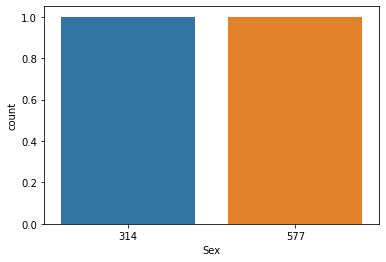

In [38]:
sns.countplot(df['Sex'].value_counts())

- Male-577
- Femal-314

<AxesSubplot:ylabel='Sex'>

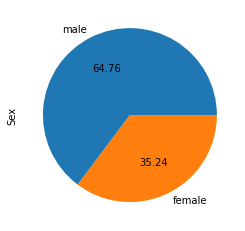

In [39]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.2f')

- Male-64.76%
- Female-35.24%

In [40]:
b=pd.crosstab(df['Pclass'],df['Sex'])
b

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


<AxesSubplot:ylabel='Pclass'>

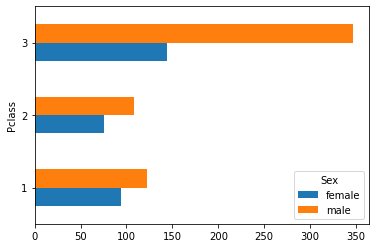

In [41]:
b.plot(kind='barh')

# Relationship between Survived and Sex

In [42]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
c=pd.crosstab(df['Survived'],df['Sex'])
c

Sex,female,male
Survived,,
0,81,468
1,233,109


In [44]:
female_alive_percentage=(314-81)/314*100
female_Deid_percentage=(314-233)/314*100
print('female_alive_percentage',female_alive_percentage)
print('female_Deid_percentage',female_Deid_percentage)

female_alive_percentage 74.20382165605095
female_Deid_percentage 25.796178343949045


In [45]:
male_alive_percentage=(577-468)/577*100
male_Deid_percentage=(577-109)/577*100
print('male_alive_percentage',male_alive_percentage)
print('male_Deid_percentage',male_Deid_percentage)

male_alive_percentage 18.890814558058924
male_Deid_percentage 81.10918544194108


- Female has very high probability than male to save their life in that accident

# Relationship between Survived and Age

<AxesSubplot:xlabel='Age'>

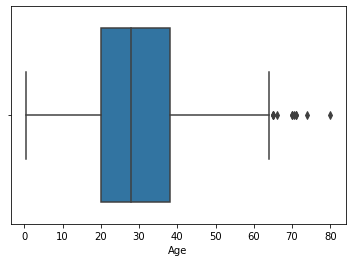

In [46]:
sns.boxplot(df['Age'])

There were 6 to 7 senior citizen people travelling.

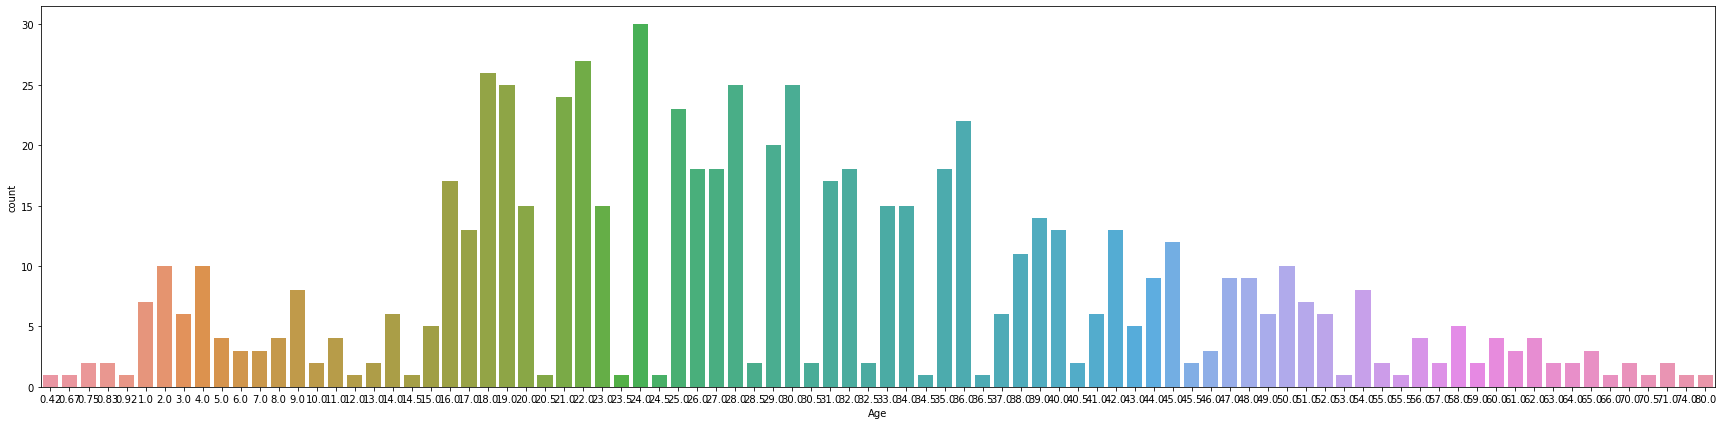

In [47]:
plt.figure(figsize=(30,7))
sns.countplot(df['Age'])
plt.savefig('Age_graph')

Most of people age were 20- 38 years

In [48]:
d=pd.crosstab(df['Survived'],df['Age'])
d

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


- 0 t0 1 yrs babies were survived.
- 64 to 79 yrs old person were not survived.
- only only 80 yrs old person had survived.

# Relationship between Survived and Fare

In [49]:
f=pd.crosstab(df['Survived'],df['Fare'])
f

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,1,0,0,1,1,1,1,0,2,0
1,1,0,0,0,0,0,0,0,0,0,...,2,2,3,0,0,3,1,2,2,3


- Very low paid ticket holder has died mostly.
- Very high paid ticket holder has survived mostly.


<AxesSubplot:xlabel='Survived'>

<Figure size 720x720 with 0 Axes>

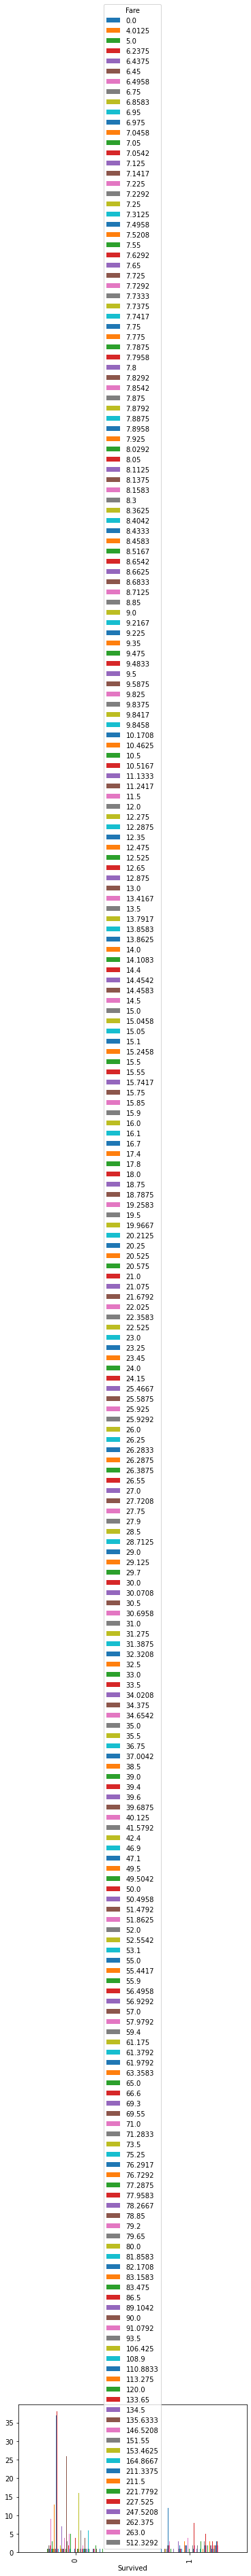

In [50]:
plt.figure(figsize=(10,10))
f.plot(kind='bar')

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Relationship between Survived and Embarked

In [52]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Embarked at s- 644
- Embarked at c- 168
- Embarked at Q-  77

<AxesSubplot:>

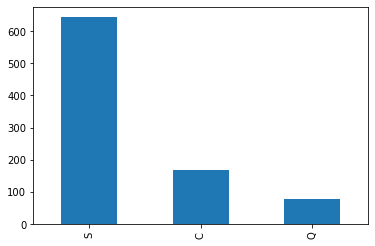

In [53]:
df['Embarked'].value_counts().plot(kind='bar')

In [54]:
E=pd.crosstab(df['Survived'],df['Embarked'])
E

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<AxesSubplot:xlabel='Survived'>

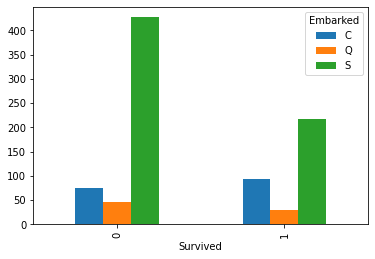

In [55]:
E.plot(kind='bar')

Who were travelling from "C" has more like to survived.

# Data cleaning

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

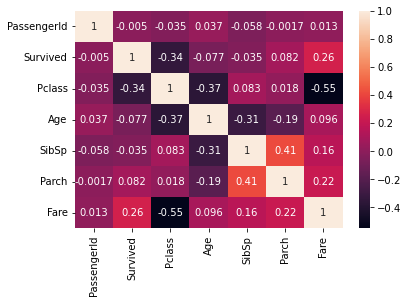

In [57]:
sns.heatmap(df.corr(),annot=True)

PassengerId, Name, Cabin and Ticket is irrelavent to the target, so need to drop it.

In [58]:
df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [60]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

High skewness present in SibSp, Parch and Fare.

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [78]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [79]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [81]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=np.nan,strategy='median')
df['Age']=SI.fit_transform(df['Age'].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [82]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [63]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

Data is imbalanced

In [83]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

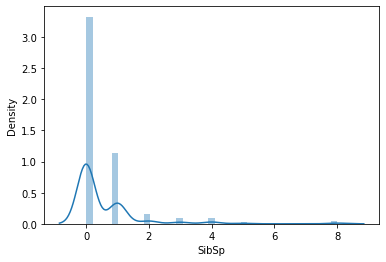

In [65]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

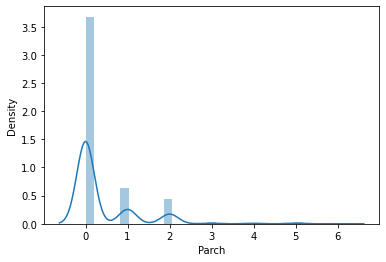

In [66]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

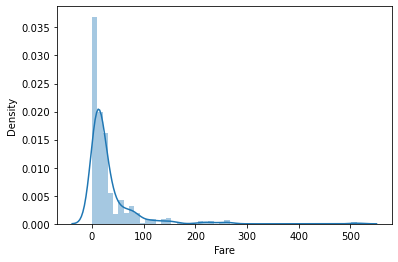

In [67]:
sns.distplot(df['Fare'])

In [74]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [84]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [85]:
z.shape

(891, 8)

In [112]:
df=df[(z<3).all(axis=1)]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


- Initial rows=891
- After outliers droped rows=820

In [113]:
loss_of_data_in_dataset=(891-820)/891*100
print('loss_of_data_in_dataset',loss_of_data_in_dataset,'%')

loss_of_data_in_dataset 7.968574635241302 %


In [114]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

In [115]:
df.corr()['Survived'].sort_values()

Sex        -0.554888
Pclass     -0.322306
Embarked   -0.150562
Age        -0.086026
SibSp       0.094459
Parch       0.201071
Fare        0.330439
Survived    1.000000
Name: Survived, dtype: float64

In [116]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [117]:
x=df.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [118]:
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [119]:
from sklearn.preprocessing import power_transform
x=power_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.58229147, ..., -0.48469263,
        -0.83470177,  0.58397897],
       [-1.47067587, -1.38497273,  0.71573902, ..., -0.48469263,
         1.55364494, -1.77327873],
       [ 0.87283049, -1.38497273, -0.24690693, ..., -0.48469263,
        -0.74331399,  0.58397897],
       ...,
       [ 0.87283049, -1.38497273, -0.08229703, ...,  2.08665417,
         0.39490799,  0.58397897],
       [-1.47067587,  0.72203588, -0.24690693, ..., -0.48469263,
         0.65432009, -1.77327873],
       [ 0.87283049,  0.72203588,  0.24155913, ..., -0.48469263,
        -0.76629016, -1.18493881]])

In [120]:
x.mean()

1.3988036435695353e-16

In [121]:
x.std()

1.0

In [123]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='Density'>

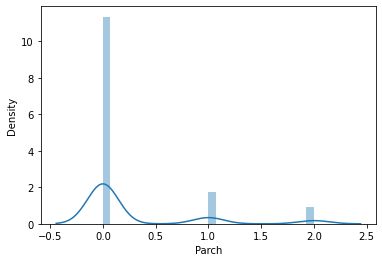

In [125]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

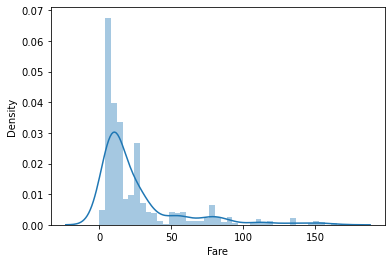

In [126]:
sns.distplot(df['Fare'])

In [127]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Dataset is not balanced

In [131]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)

<AxesSubplot:xlabel='Survived', ylabel='count'>

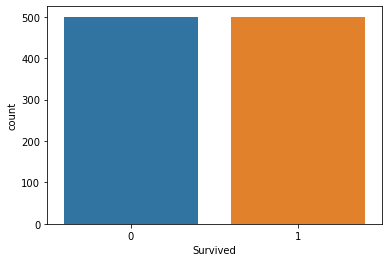

In [134]:
sns.countplot(y1)

Now dataset is balanced

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [160]:
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,test_size=.20,random_state=47)
lr=LogisticRegression()
lr.fit(train_x1,train_y1)
lrpred=lr.predict(test_x1)
lrpred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0], dtype=int64)

In [161]:
print(accuracy_score(lrpred,test_y1))
print(confusion_matrix(lrpred,test_y1))
print(classification_report(lrpred,test_y1))

0.84
[[80 16]
 [16 88]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        96
           1       0.85      0.85      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [166]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
mnb=MultinomialNB()
dtr=DecisionTreeClassifier()
svc=SVC(kernel='poly')
knn=KNeighborsClassifier()

model=[dtr,svc,knn]

In [167]:
for i in model:
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    print('Accuracy score of',i, 'is')
    print(accuracy_score(pred,test_y1))
    print(confusion_matrix(pred,test_y1))
    print(classification_report(pred,test_y1))

Accuracy score of DecisionTreeClassifier() is
0.825
[[80 19]
 [16 85]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.82      0.84      0.83       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Accuracy score of SVC(kernel='poly') is
0.835
[[85 22]
 [11 82]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.79      0.88      0.83        93

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

Accuracy score of KNeighborsClassifier() is
0.86
[[79 11]
 [17 93]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        90
           1       0.89      0.85

In [190]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x1,y1,cv=67)
print(score)
print(score.mean())
print(score.std())

[0.73333333 0.6        0.73333333 0.6        0.86666667 0.86666667
 0.8        0.73333333 0.93333333 0.53333333 0.8        0.86666667
 0.8        0.73333333 0.73333333 1.         0.86666667 0.8
 0.86666667 0.8        0.8        0.66666667 0.86666667 0.8
 0.8        0.73333333 0.73333333 0.8        0.8        0.86666667
 0.73333333 0.8        0.86666667 0.73333333 0.86666667 0.53333333
 0.6        0.8        0.8        0.93333333 0.73333333 0.86666667
 0.8        0.93333333 0.93333333 0.8        0.86666667 0.73333333
 0.93333333 0.86666667 0.93333333 0.73333333 0.93333333 0.8
 0.86666667 0.8        0.8        0.86666667 0.93333333 0.73333333
 0.8        0.8        0.92857143 1.         0.71428571 0.92857143
 0.92857143]
0.8084577114427862
0.10032546250374214


Does not perform well with any of the algorithm

In [195]:
score=cross_val_score(dtr,x1,y1,cv=68)
print(score)
print(score.mean())
print(score.std())

[0.86666667 0.6        0.8        0.73333333 0.93333333 0.73333333
 0.8        0.86666667 0.86666667 0.6        0.66666667 0.86666667
 0.66666667 0.8        0.73333333 0.86666667 0.66666667 0.73333333
 0.86666667 0.86666667 0.8        0.8        0.66666667 0.73333333
 0.8        0.86666667 0.73333333 0.86666667 0.66666667 0.8
 0.86666667 0.86666667 0.86666667 0.73333333 0.8        0.86666667
 0.66666667 0.66666667 0.8        0.6        0.86666667 0.8
 1.         0.8        0.93333333 0.8        1.         0.86666667
 0.64285714 0.85714286 0.92857143 0.71428571 0.85714286 0.71428571
 0.85714286 0.78571429 0.78571429 1.         0.64285714 0.92857143
 0.78571429 0.92857143 0.92857143 0.92857143 0.85714286 0.78571429
 0.92857143 0.78571429]
0.8045518207282913
0.09953685540166975


# Bagging

In [203]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,random_state=47)
rfc.fit(train_x1,train_y1)
rfcpred=rfc.predict(test_x1)
print(accuracy_score(rfcpred,test_y1))
print(confusion_matrix(rfcpred,test_y1))
print(classification_report(rfcpred,test_y1))

0.865
[[85 16]
 [11 88]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       101
           1       0.85      0.89      0.87        99

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200



# Boosting

In [215]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=250,base_estimator=svc,algorithm='SAMME')
adb.fit(train_x1,train_y1)
adbpred=adb.predict(test_x1)
print(accuracy_score(adbpred,test_y1))
print(confusion_matrix(adbpred,test_y1))
print(classification_report(adbpred,test_y1))

0.48
[[ 96 104]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       200
           1       0.00      0.00      0.00         0

    accuracy                           0.48       200
   macro avg       0.50      0.24      0.32       200
weighted avg       1.00      0.48      0.65       200



In [218]:
from sklearn.ensemble import GradientBoostingClassifier
gb=AdaBoostClassifier(n_estimators=75,base_estimator=svc,algorithm='SAMME')
gb.fit(train_x1,train_y1)
gbpred=gb.predict(test_x1)
print(accuracy_score(gbpred,test_y1))
print(confusion_matrix(gbpred,test_y1))
print(classification_report(gbpred,test_y1))

0.48
[[ 96 104]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       200
           1       0.00      0.00      0.00         0

    accuracy                           0.48       200
   macro avg       0.50      0.24      0.32       200
weighted avg       1.00      0.48      0.65       200



# Knn is working best among all model with accuracy of 86%


In [219]:
import joblib
joblib.dump(knn,'Titanic_best_model.obj')

['Titanic_best_model.obj']

In [220]:
predknn=joblib.load('Titanic_best_model.obj')

In [222]:
best=(predknn.predict(test_x1))
best

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [225]:
best1=pd.DataFrame(best)
best1.value_counts()

1    110
0     90
dtype: int64

In [230]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [231]:
predknn.predict([[3,1,22.0,1,0,7.2500,2]])

array([0], dtype=int64)

In [232]:
predknn.predict([[1,0,38.0,1,0,71.2833,0]])

array([1], dtype=int64)

# Above these two prediction providing 100% accurate result